In [1]:
# !pip install deepeval

# LLM Benchmarks Explained: Everything on MMLU, HellaSwag, BBH, and Beyond

Source:
https://www.confident-ai.com/blog/llm-benchmarks-mmlu-hellaswag-and-beyond


Tool Used:

DeepEval
https://github.com/confident-ai/deepeval


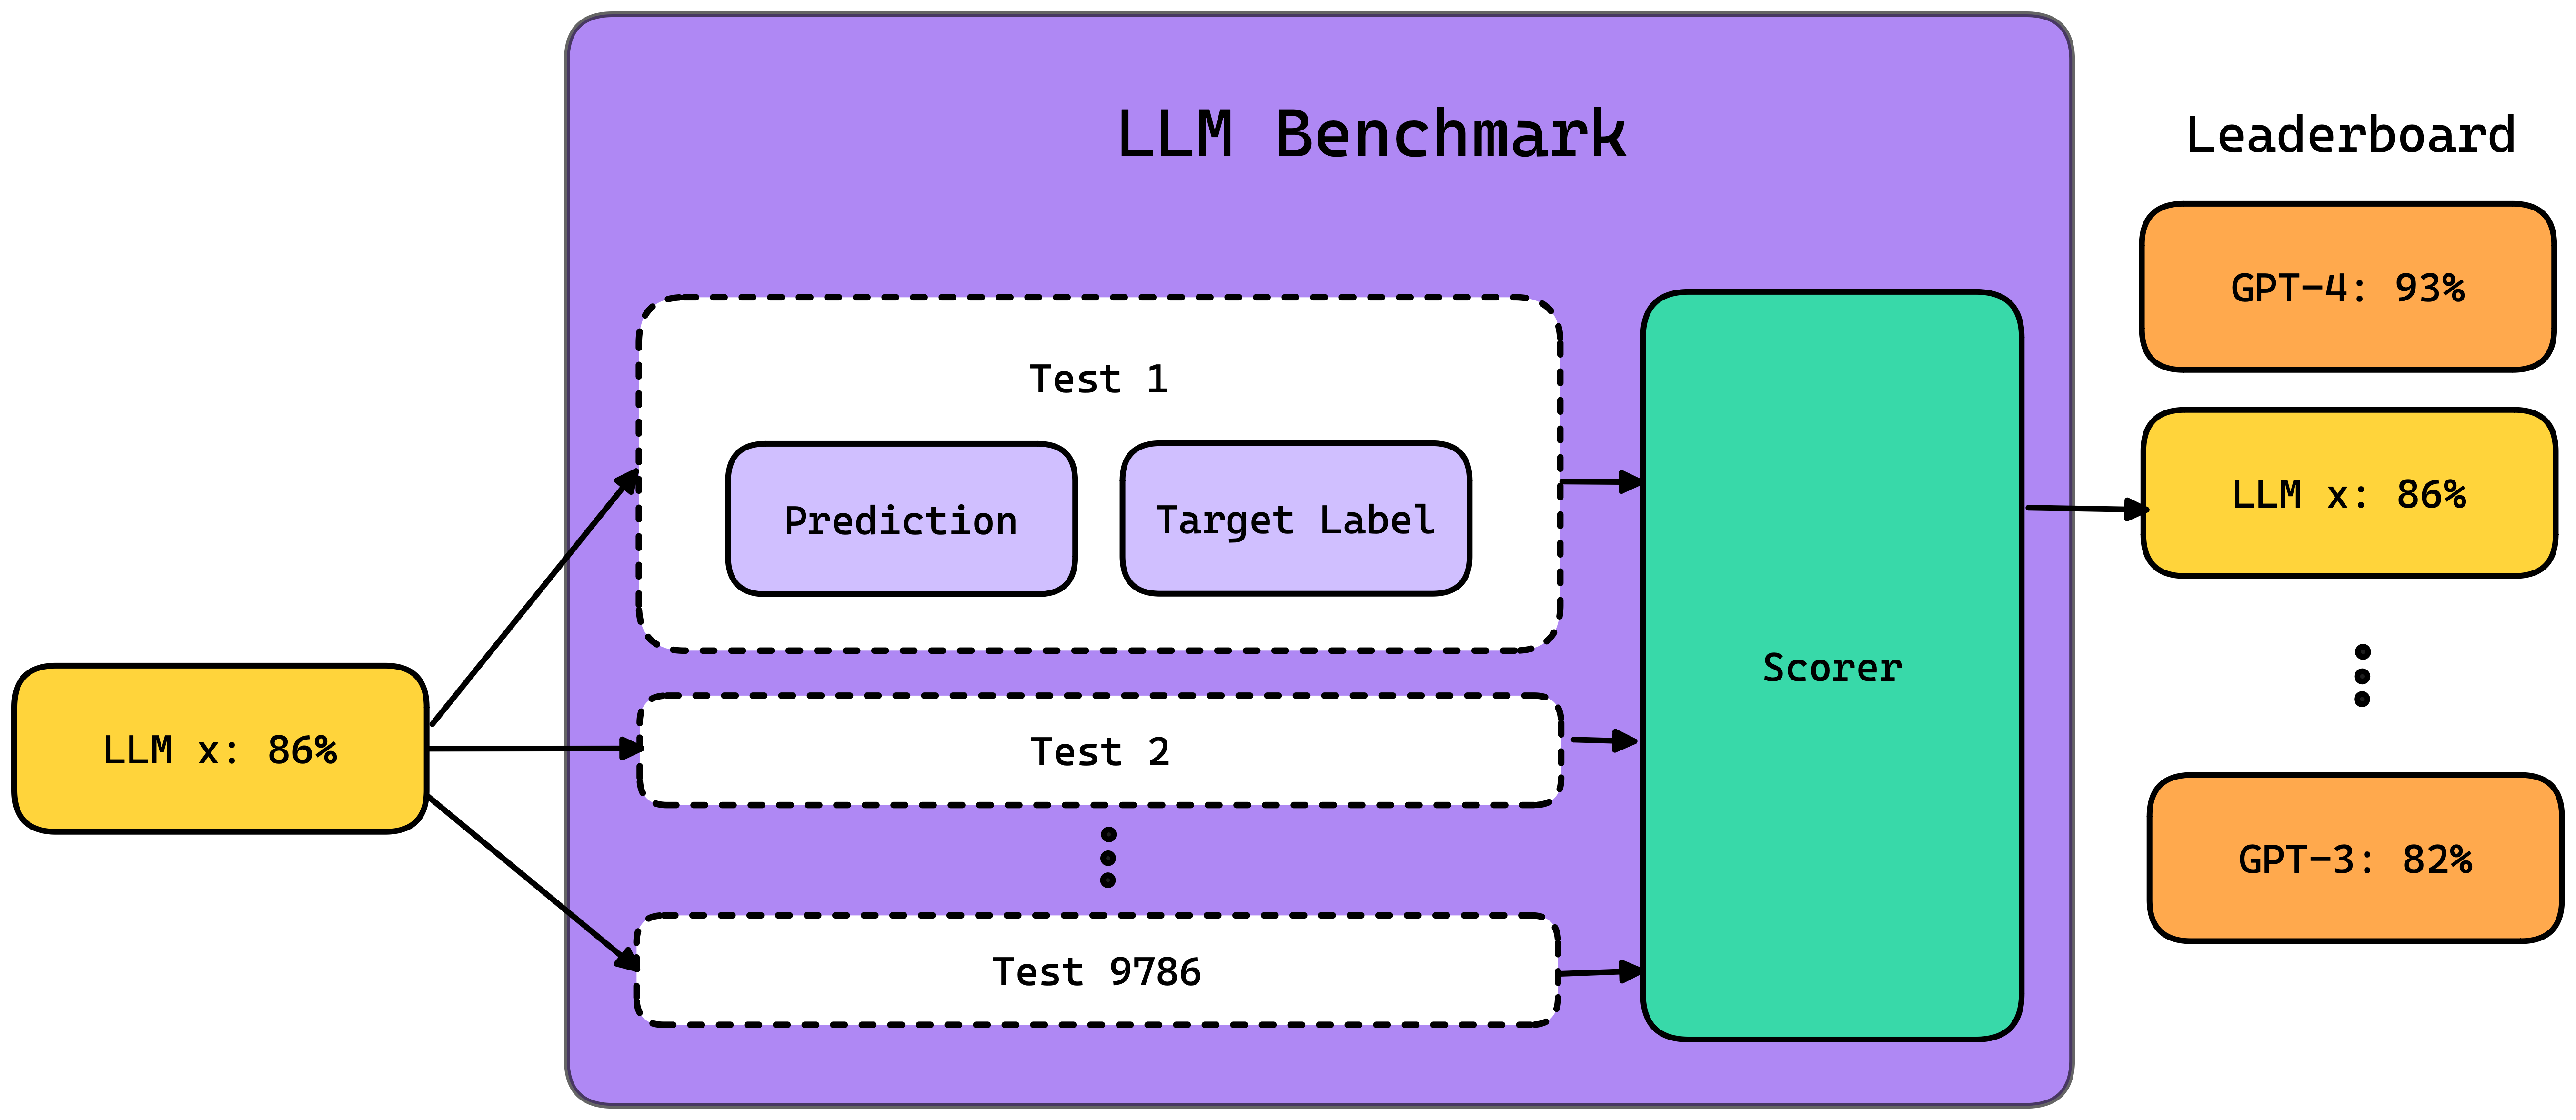

In [2]:
from IPython.display import Image
Image(filename="./figures/benchmark_1.png", embed=True, width = 800, height = 400)

Different benchmarks assess various aspects of a model’s capabilities, including:

- Reasoning and Commonsense: These benchmarks test an LLM’s ability to apply logic and everyday knowledge to solve problems.

- Language Understanding and Question Answering (QA): These evaluate a model’s ability to interpret text and answer questions accurately.

- Coding: Benchmarks in this category evaluate LLMs on their ability to interpret and generate code.

- Conversation and Chatbots: These tests an LLM’s ability to engage in dialogue and provide coherent, relevant responses.

- Translation: These assess the model’s ability to accurately translate text from one language to another.

- Math: These focus on a model’s ability to solve math problems, from basic arithmetic to more complex areas such as calculus.

- Logic: Logic benchmarks evaluate a model’s ability to apply logical reasoning skills, such as inductive and deductive reasoning.

- Standardized Tests: SAT, ACT, or other educational assessments are also used to evaluate and benchmark the model’s performance.

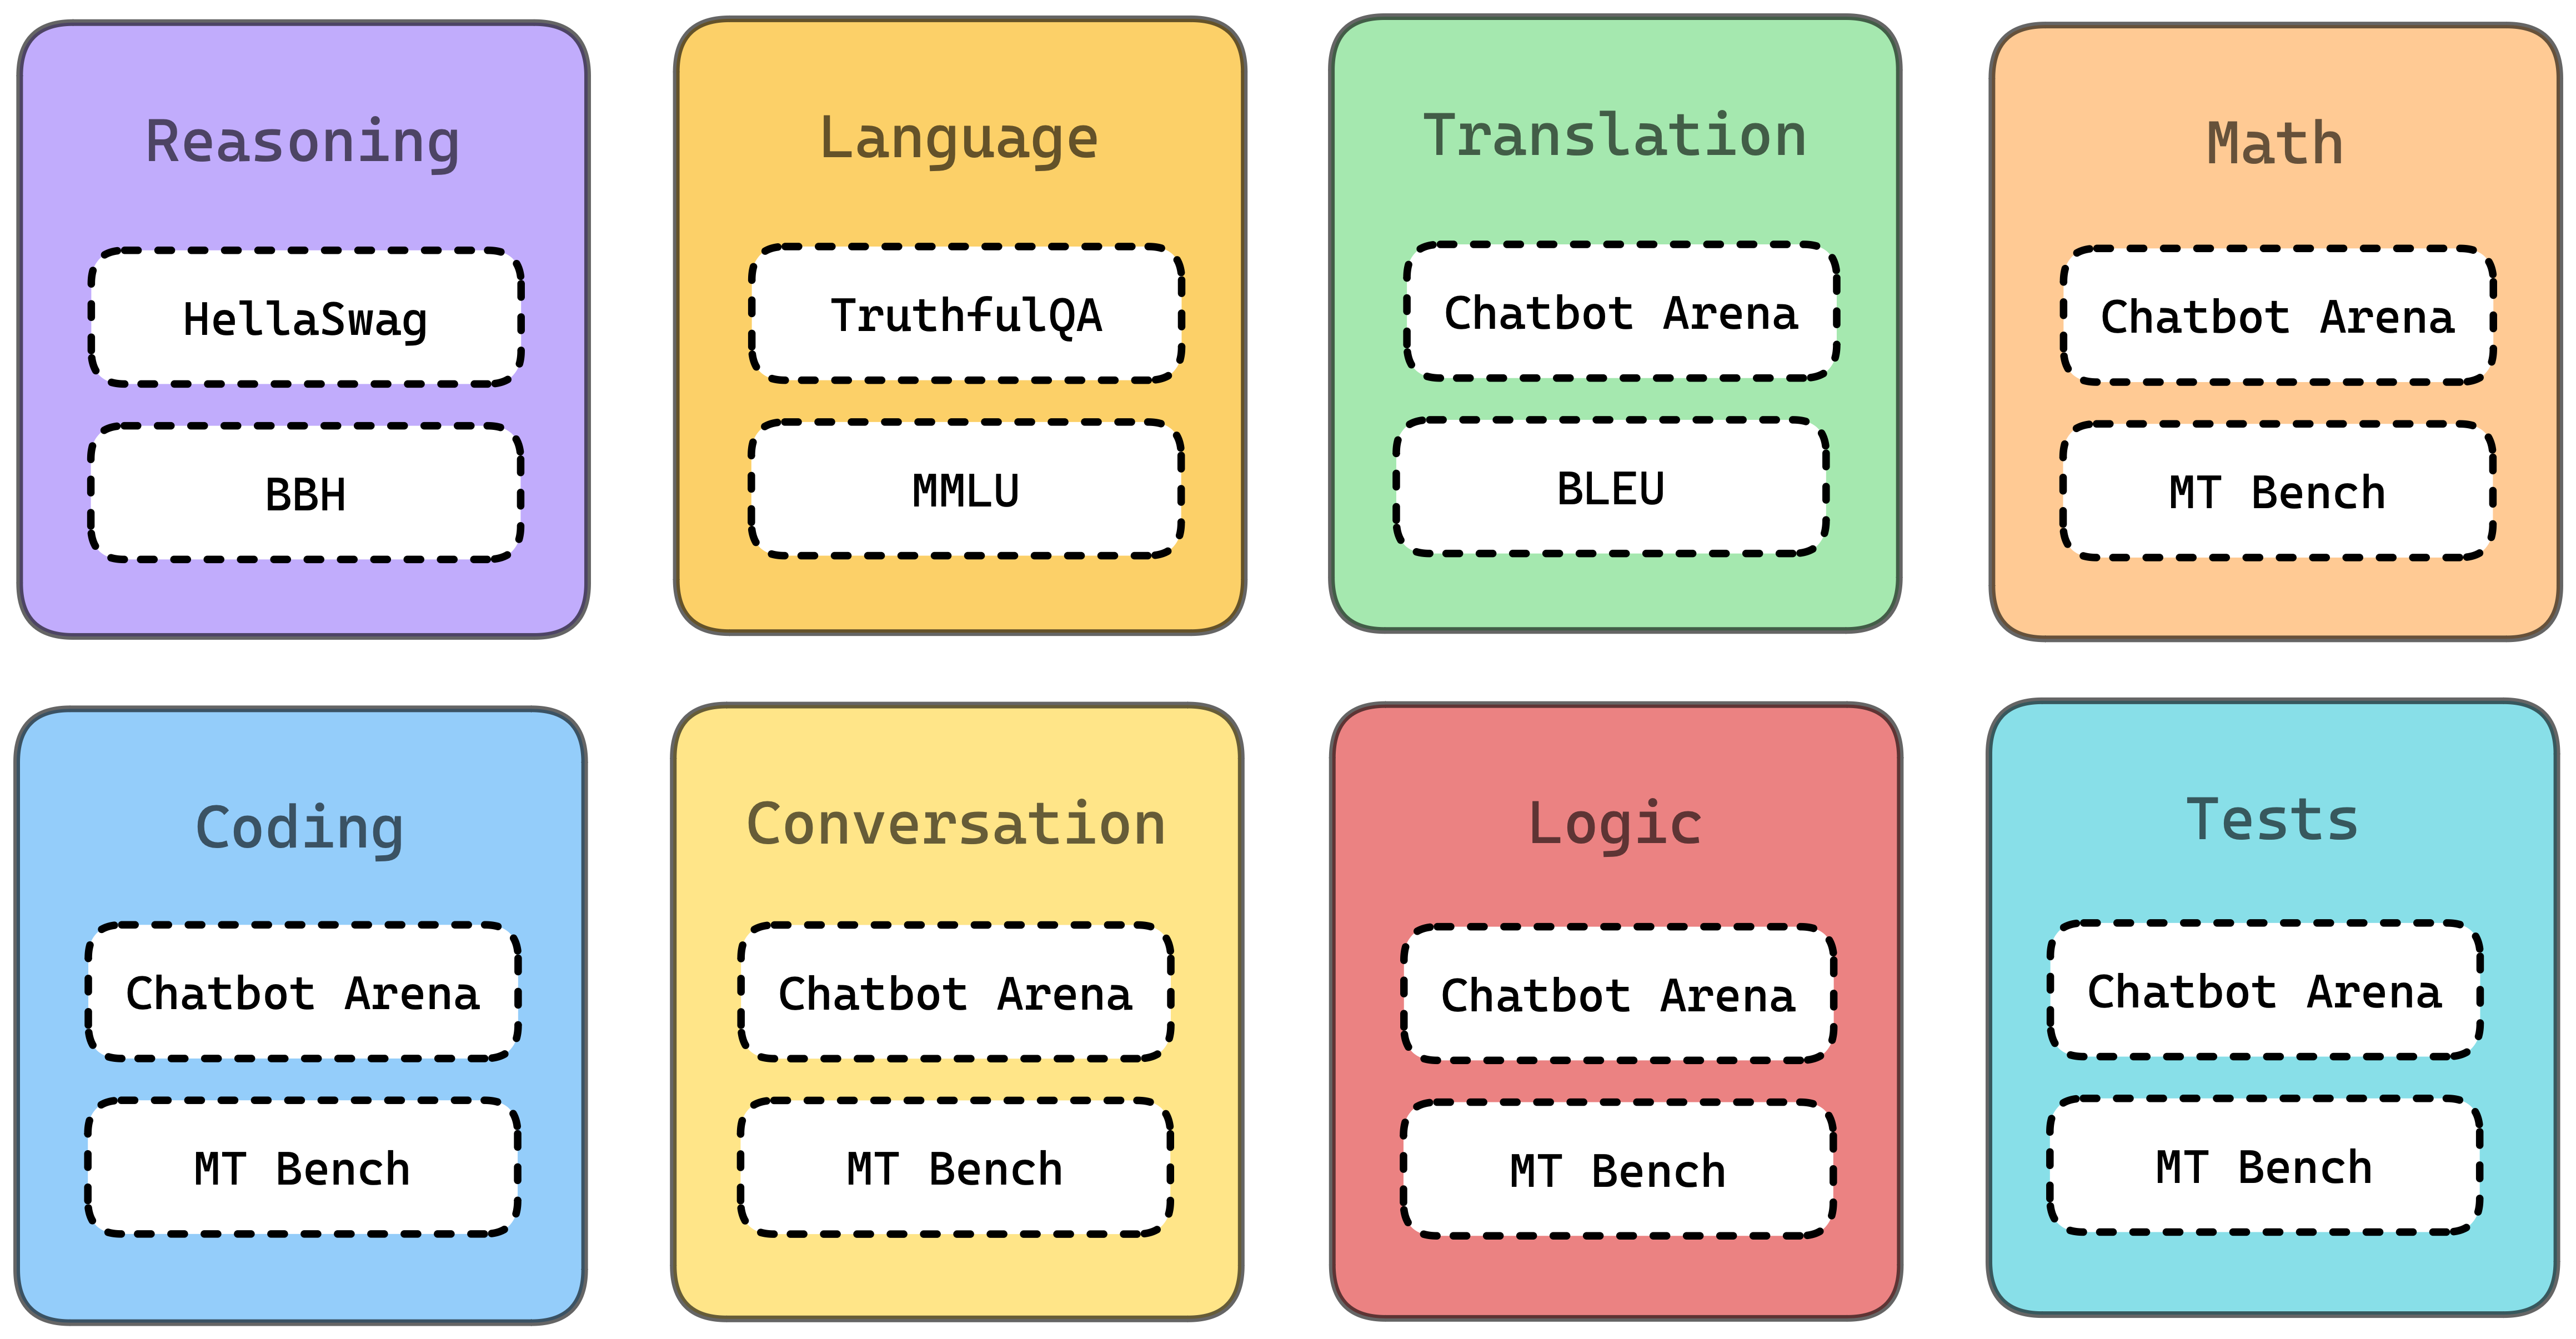

In [3]:
from IPython.display import Image
Image(filename="./figures/benchmark_2.png", embed=True, width = 800, height = 400)

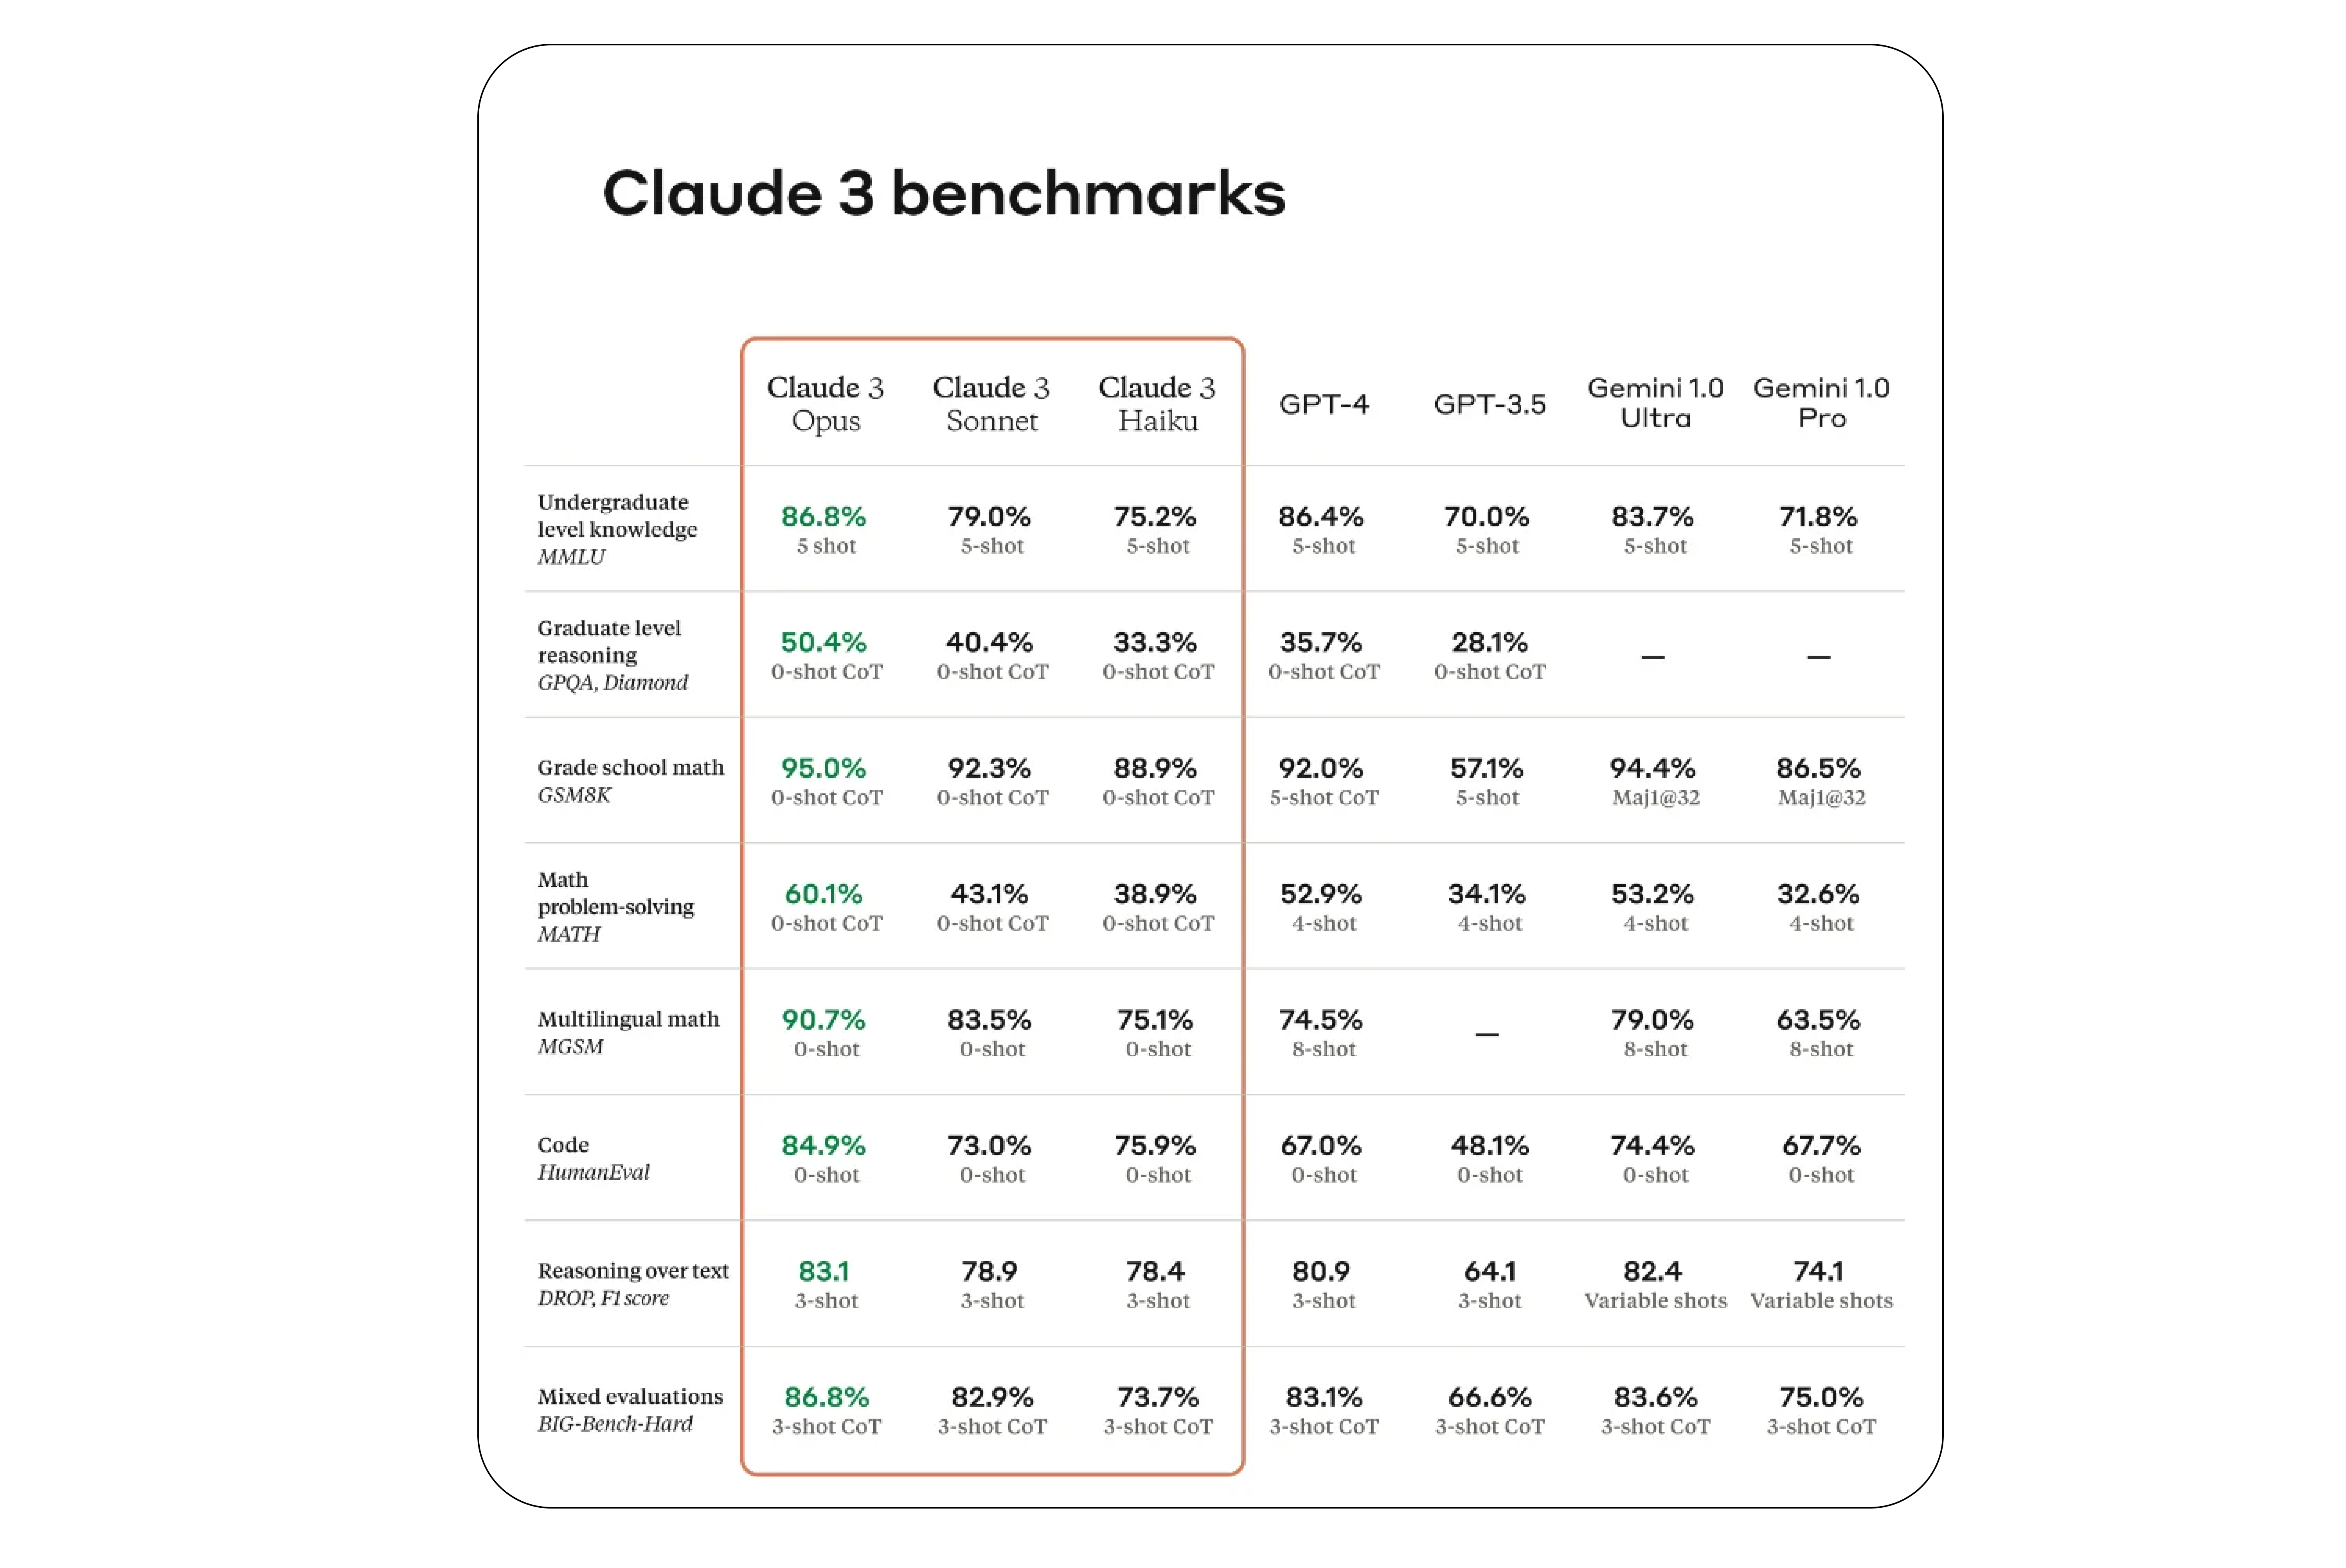

In [7]:
from IPython.display import Image
Image(filename="./figures/benchmark_3.png", embed=True, width = 1000, height = 500)

### Different Types of LLM Benchmarks

4 most critical domains: Language Understanding, Reasoning, Coding, and Conversation.

These benchmarks include:

- **TruthfulQA** — Truthfulness
- **MMLU** — Language understanding
- **HellaSwag** — Commonsense reasoning
- **BIG-Bench Hard** — Challenging reasoning tasks
- **HumanEval** — Coding challenges
- **CodeXGLUE** — Programming tasks
- **Chatbot Arena** — Human-ranked ELO-based benchmark
- **MT Bench** — Complex conversational ability

### Create a custom LLM with DeepEval

Source: https://docs.confident-ai.com/docs/benchmarks-introduction#benchmarking-your-llm

In [ ]:
from huggingface_hub import login
token = open(".hugging_face_token.txt", "r").read().strip()
login(token)

In [ ]:
from typing import List
from transformers import AutoModelForCausalLM, AutoTokenizer
from deepeval.models.base_model import DeepEvalBaseLLM

class Mistral7B(DeepEvalBaseLLM):
    def __init__(
        self,
        model,
        tokenizer
    ):
        self.model = model
        self.tokenizer = tokenizer

    def load_model(self):
        return self.model

    def generate(self, prompt: str) -> str:
        model = self.load_model()

        device = "cuda" # the device to load the model onto

        model_inputs = self.tokenizer([prompt], return_tensors="pt").to(device)
        model.to(device)

        generated_ids = model.generate(**model_inputs, max_new_tokens=100, do_sample=True)
        return self.tokenizer.batch_decode(generated_ids)[0]

    async def a_generate(self, prompt: str) -> str:
        return self.generate(prompt)

    # This is optional.
    def batch_generate(self, promtps: List[str]) -> List[str]:
        model = self.load_model()
        device = "cuda" # the device to load the model onto

        model_inputs = self.tokenizer(promtps, return_tensors="pt").to(device)
        model.to(device)

        generated_ids = model.generate(**model_inputs, max_new_tokens=100, do_sample=True)
        return self.tokenizer.batch_decode(generated_ids)

    def get_model_name(self):
        return "Mistral 7B"

In [ ]:
class Ollama(DeepEvalBaseLLM):
    def __init__(
        self,
        model,
        tokenizer
    ):
        self.model = model
        self.tokenizer = tokenizer

    def load_model(self):
        return self.model

    def generate(self, prompt: str) -> str:
        model = self.load_model()

        device = "cuda" # the device to load the model onto

        model_inputs = self.tokenizer([prompt], return_tensors="pt").to(device)
        model.to(device)

        generated_ids = model.generate(**model_inputs, max_new_tokens=100, do_sample=True)
        return self.tokenizer.batch_decode(generated_ids)[0]

    async def a_generate(self, prompt: str) -> str:
        return self.generate(prompt)

    # This is optional.
    def batch_generate(self, promtps: List[str]) -> List[str]:
        model = self.load_model()
        device = "cuda" # the device to load the model onto

        model_inputs = self.tokenizer(promtps, return_tensors="pt").to(device)
        model.to(device)

        generated_ids = model.generate(**model_inputs, max_new_tokens=100, do_sample=True)
        return self.tokenizer.batch_decode(generated_ids)

    def get_model_name(self):
        return "Ollama"

In [ ]:
model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-2-7b-chat-hf")
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-2-7b-chat-hf")

ollama = Ollama(model=model, tokenizer=tokenizer)

# model = AutoModelForCausalLM.from_pretrained("mistralai/Mistral-7B-v0.1")
# tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-v0.1")

# mistral_7b = Mistral7B(model=model, tokenizer=tokenizer)
# print(mistral_7b("Write me a joke"))

### Language Understanding and QA Benchmarks

#### TruthfulQA

TruthfulQA evaluates models on their ability to provide accurate and truthful answers, which is crucial for combating misinformation and promoting ethical AI usage.

In [ ]:
from deepeval.benchmarks import TruthfulQA
from deepeval.benchmarks.modes import TruthfulQAMode

# Define benchmark with specific shots
benchmark = TruthfulQA(mode=TruthfulQAMode.MC2)

# Replace 'mistral_7b' with your own custom model
# benchmark.evaluate(model=mistral_7b)
benchmark.evaluate(model=ollama)
print(benchmark.overall_score)

#### MMLU (Massive Multitask Language Understanding)

MMLU is aimed at evaluating models based on the knowledge they acquired during pre-training, focusing solely on zero-shot and few-shot settings.

MMLU scores an LLM simply based on the proportion of correct answers. The output must be an exact match to be considered correct.

In [ ]:
from deepeval.benchmarks import MMLU
from deepeval.benchmarks.tasks import MMLUTask

# Define benchmark with specific tasks and shots
benchmark = MMLU(
    tasks=[MMLUTask.HIGH_SCHOOL_COMPUTER_SCIENCE, MMLUTask.ASTRONOMY],
    n_shots=3
)

# Replace 'mistral_7b' with your own custom model
# benchmark.evaluate(model=mistral_7b)
benchmark.evaluate(model=ollama)
print(benchmark.overall_score)

### Common-sense and Reasoning Benchmarks

#### HellaSwag

HellaSwag evaluates the common-sense reasoning capabilities of LLM models through sentence completion. It tests whether LLM models can select the appropriate ending from a set of 4 choices across 10,000 sentences.

In [ ]:
from deepeval.benchmarks import HellaSwag
from deepeval.benchmarks.tasks import HellaSwagTask

# Define benchmark with specific tasks and shots
benchmark = HellaSwag(
    tasks=[HellaSwagTask.TRIMMING_BRANCHES_OR_HEDGES, HellaSwagTask.BATON_TWIRLING],
    n_shots=5
)

# Replace 'mistral_7b' with your own custom model
# benchmark.evaluate(model=mistral_7b)
benchmark.evaluate(model=ollama)
print(benchmark.overall_score)

#### BIG-Bench Hard (Beyond the Imitation Game Benchmark)

BIG-Bench Hard (BBH) selects 23 challenging tasks from the original BIG-Bench suite, which consisted of a diverse evaluation set of 204 tasks already beyond the capabilities of language models at the time.

Note: 

The authors of BBH were able to outperform humans on 17 of these tasks with the same exact LLMs using Chain-of-Thought (CoT) prompting.

from deepeval.benchmarks import BigBenchHard
from deepeval.benchmarks.tasks import BigBenchHardTask

# Define benchmark with specific tasks and shots
benchmark = BigBenchHard(
    tasks=[BigBenchHardTask.BOOLEAN_EXPRESSIONS, BigBenchHardTask.CAUSAL_JUDGEMENT],
    n_shots=3,
    enable_cot=True
)

# Replace 'mistral_7b' with your own custom model
benchmark.evaluate(model=mistral_7b)
print(benchmark.overall_score)

### Coding Benchmarks

#### HumanEval

HumanEval consists of 164 unique programming tasks designed to evaluate a model’s code generation abilities. 

These tasks cover a broad spectrum, from algorithms to the comprehension of programming languages.

In [ ]:
def sum_list(numbers: List[float]) -> float:
    return sum(numbers)

In [ ]:
from deepeval.benchmarks import HumanEval

# Define benchmark with number of code generations
benchmark = HumanEval(n=100)

# Replace 'gpt_4' with your own custom model
# benchmark.evaluate(model=gpt_4, k=10)
# benchmark.evaluate(model=mistral_7b)
benchmark.evaluate(model=ollama)
print(benchmark.overall_score)

#### CodeXGLUE

CodeXGLUE offers 14 datasets across 10 different tasks to test and compare models directly in various coding scenarios such as code completion, code translation, code summarization, and code search

### Conversation and Chatbot Benchmarks

#### Chatbot Arena

The Chatbot Arena is an open platform for ranking language models using over 200K human votes. 

Users can anonymously quiz and judge pairs of AI models like ChatGPT or Claude without knowing their identities, and votes are counted towards rankings only if the model identities stay hidden. 

#### MT Bench

MT-bench evaluates chat assistants’ quality by presenting them with a series of multi-turn open-ended questions, utilizing LLMs as judges. 

This approach tests chat assistants’ ability to handle complex interactions. 

MT-Bench uses GPT-4 to score on a conversation on a scale of 10, and compute the average score on all turns to get the final score.